# Applying KMeans Clustering on an image

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

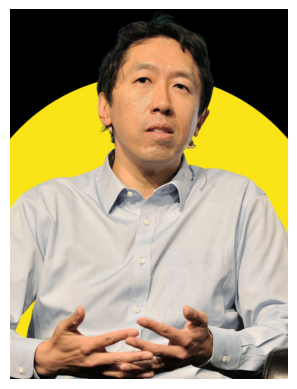

In [50]:
# Import the image
img = cv2.imread("/content/andrew_ng.jpg")
h, w = img.shape[:2]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [51]:
# Reshape the image
im = (img_rgb/255).reshape(w*h, 3)

In [52]:
# Initialize centroids
import random
K = 8
init_centroids = random.sample(range(0,len(im)), K)

centroids = []
for i in init_centroids:
  centroids.append(im[i])

centroids

[array([0.98039216, 0.89019608, 0.09019608]),
 array([0.98431373, 0.87058824, 0.11764706]),
 array([0.85098039, 0.83137255, 0.81960784]),
 array([0., 0., 0.]),
 array([0.31764706, 0.22352941, 0.17647059]),
 array([0.98039216, 0.89019608, 0.09019608]),
 array([0.83529412, 0.79607843, 0.76078431]),
 array([0.8627451 , 0.83529412, 0.80392157])]

In [53]:
# Calculate the distance
def calc_dist(x1,x2):
  return (sum((x1 - x2)**2))**0.5


# Finding the closest centroids
def find_closest_centroid(centroid,X):
  assigned_centroid = []

  for i in X:
    distance = []
    for j in centroid:
      distance.append(calc_dist(i,j))
    assigned_centroid.append(np.argmin(distance))

  return assigned_centroid


# Mean of the observations falling in each cluster category
def new_centroid(centroid,X):
  new_centroids = []
  new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(centroid, columns=['centroid'])], axis=1)

  for c in set(new_df['centroid']):
    current_cluster = new_df[new_df['centroid'] == c][new_df.columns[:-1]]
    new_mean = current_cluster.mean(axis = 0)
    new_centroids.append(new_mean)

  return new_centroids

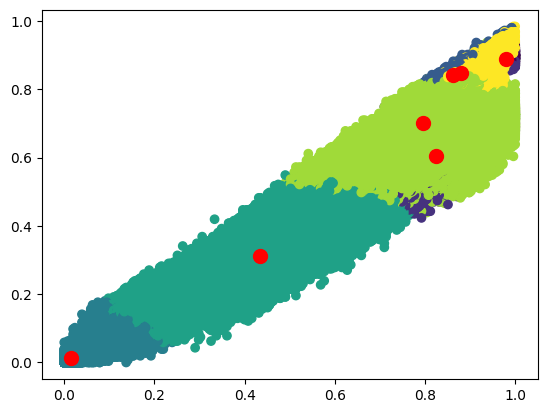

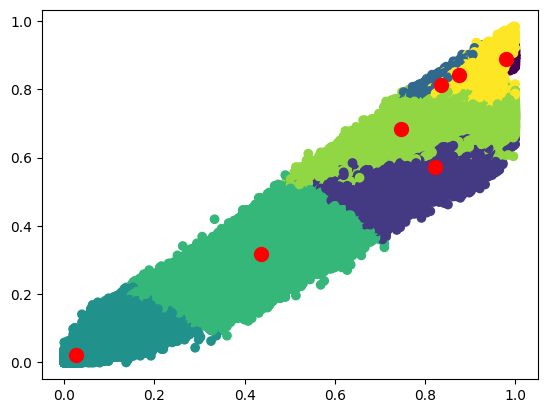

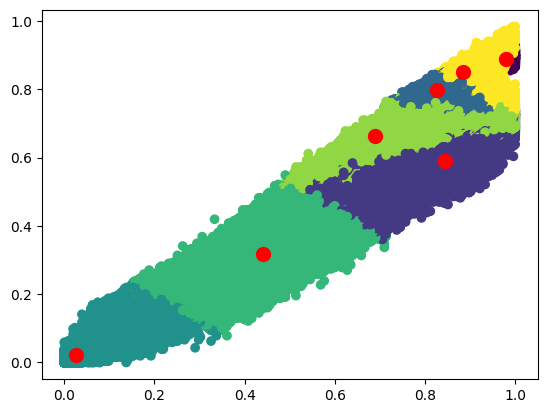

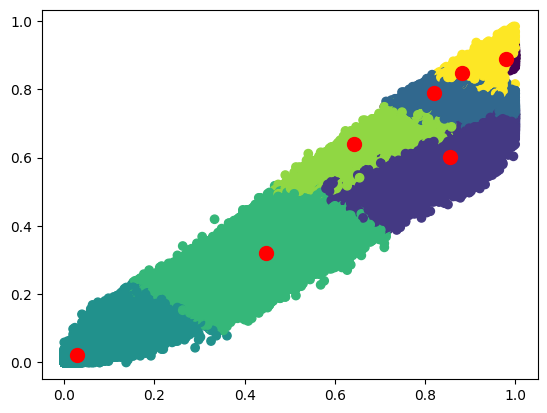

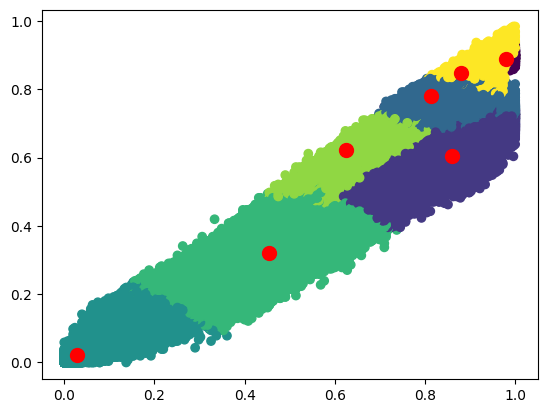

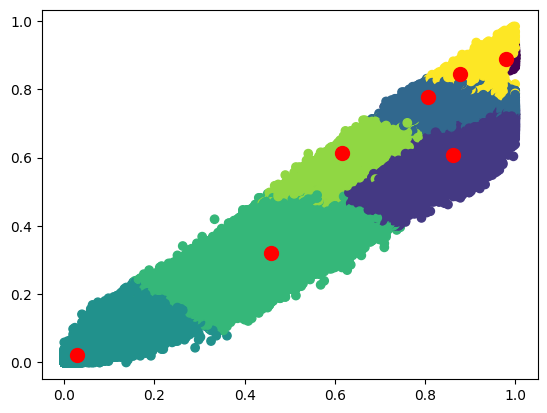

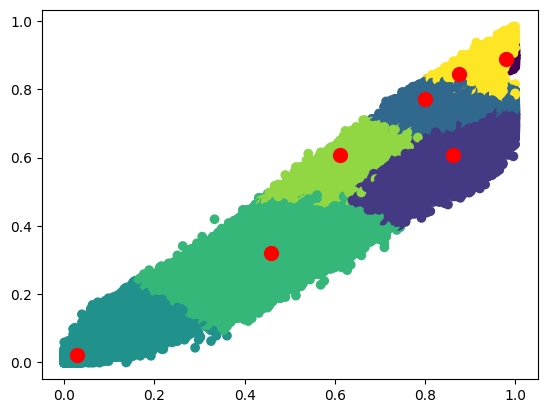

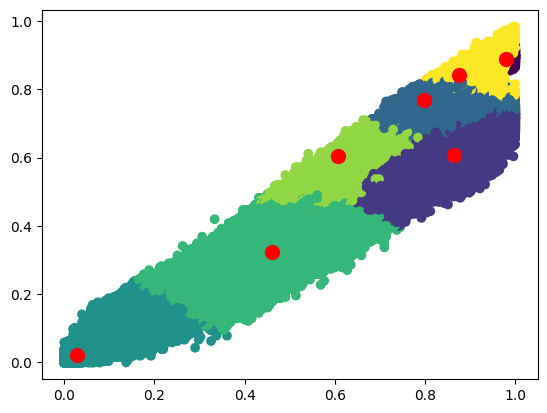

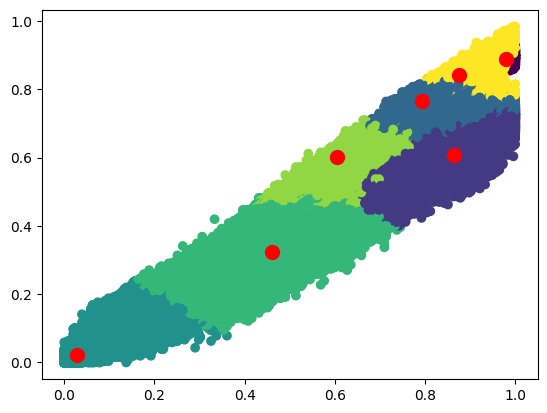

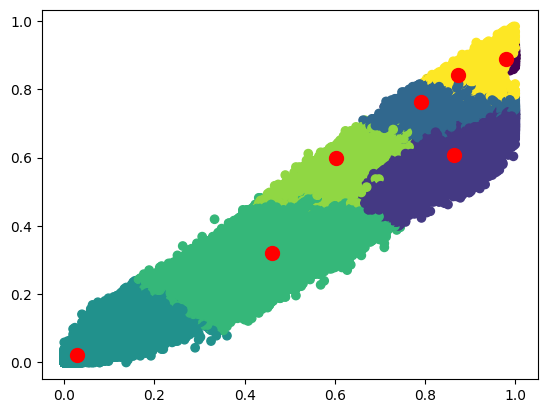

In [55]:
X = np.array(im)
for i in range(10):
  obs_cen = find_closest_centroid(centroids,X)
  centroids = new_centroid(obs_cen,X)
  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = obs_cen)
  plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], color='red', s=100)
  plt.show()

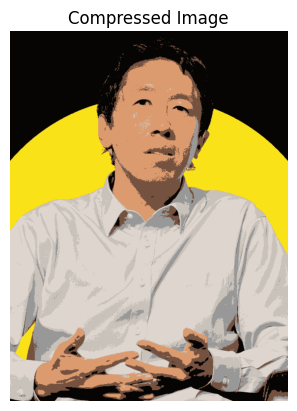

In [56]:
# Display compressed image
im_recovered = np.array(centroids)[obs_cen].reshape(h, w, 3)
plt.imshow(im_recovered)
plt.axis('off')
plt.title('Compressed Image')
plt.show()